In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pickle
from pathlib import Path
%matplotlib inline


Bad key savefig.frameon in file C:\Users\moyer\anaconda3\envs\quant\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\moyer\anaconda3\envs\quant\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\moyer\anaconda3\envs\quant\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need t

In [2]:
URL = "https://www.ssa.gov/oact/STATS/table4c6.html"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

In [3]:
table = soup.find_all("table")[0]
tbody = table.find('tbody')
tr = tbody.find_all('tr')
for row in tr:
    if (len(row.find_all('td')) == 7):
        age, m_d_p, m_nof, m_life_exp, f_d_p, f_nof, f_life_exp = row.find_all('td')
        df = df.append({
            "age":age.text,
            "m_d_p":m_d_p.text,
            "m_nof":m_nof.text,
            "m_life_exp":m_life_exp.text,
            "f_d_p":f_d_p.text,
            "f_nof":f_nof.text,
            "f_life_exp":f_life_exp.text
        }, ignore_index=True)

NameError: name 'df' is not defined

In [4]:
# df.head()
# df.to_pickle("Users\moyer\OneDrive\development\fin-dashboard\curve.pkl") # save
df = pd.read_pickle("Users\moyer\OneDrive\development\fin-dashboard\curve.pkl") # load

FileNotFoundError: [Errno 2] No such file or directory: 'Users\\moyer\\OneDrive\\development\x0cin-dashboard\\curve.pkl'

In [51]:
df.head()

,age,m_d_p,m_nof,m_life_exp,f_d_p,f_nof,f_life_exp
0,0,0.006081,"100,000",76.23,0.005046,"100,000",81.28
1,1,0.000425,"99,392",75.69,0.000349,"99,495",80.69
2,2,0.000260,"99,350",74.73,0.000212,"99,461",79.72
3,3,0.000194,"99,324",73.75,0.000166,"99,440",78.74
4,4,0.000154,"99,305",72.76,0.000137,"99,423",77.75


In [42]:
cols = ['age','m_d_p','m_nof','m_life_exp','f_d_p','f_nof','f_life_exp']
df = pd.DataFrame(columns = cols)

In [64]:

my_path = Path("C:/Users/moyer/OneDrive/development/fin-dashboard/curve.pkl")
with my_path.open('wb') as fp:
    pickle.dump(df, fp)

In [5]:
my_path = Path("C:/Users/moyer/OneDrive/development/fin-dashboard/curve.pkl")
with open(my_path, 'rb') as f:
    x = pickle.load(f)

In [6]:
x

,age,m_d_p,m_nof,m_life_exp,f_d_p,f_nof,f_life_exp
0,0,0.006081,"100,000",76.23,0.005046,"100,000",81.28
1,1,0.000425,"99,392",75.69,0.000349,"99,495",80.69
2,2,0.000260,"99,350",74.73,0.000212,"99,461",79.72
3,3,0.000194,"99,324",73.75,0.000166,"99,440",78.74
4,4,0.000154,"99,305",72.76,0.000137,"99,423",77.75
...,...,...,...,...,...,...,...
115,115,0.723259,0,0.86,0.717864,0,0.87
116,116,0.759422,0,0.80,0.759422,0,0.80
117,117,0.797393,0,0.74,0.797393,0,0.74
118,118,0.837263,0,0.68,0.837263,0,0.68


In [24]:
P = 100000
r = 0.04
n = 30
def calcPayment(pv, r, n):
    nom = r * pv
    denom = (1 - (1+r)**-n)
    return nom/denom

def calcAmountNeeded(p, r, n):
    

calcPayment(P,r,n)

5783.0099133661315

In [55]:
def getPayout(current_age=45, sex="male",income=80000,savings=50000,expenses=500,retirement_age=65, health_info={}):
    EXPENSE_GROWTH = 1.004
    PRINCIPAL_GROWTH = 1.004
    
    my_path = Path(
        "C:/Users/moyer/OneDrive/development/fin-dashboard/curve.pkl")
    with open(my_path, 'rb') as f:
        x = pickle.load(f)
        
        estimate = x[x.index == current_age]
        if (sex == 'male'):
            estimated_end_year = int(float(estimate.m_life_exp)) + current_age
#         print(estimated_end_year)
            
#         return(estimate)
        year_expense = expenses * 12
        cols = ['age', 'savings', 'expenses','monthly_payment']
        df = pd.DataFrame(columns = cols)
    
        encore_holding = savings
        monthly_payout = 12 * calcPayment(encore_holding, PRINCIPAL_GROWTH-1, int(float(estimate.m_life_exp)))
        print(monthly_payout)
        for index, row in x[current_age:].iterrows():
            if (int(row.age) == current_age):
                # current year
                df = df.append({
                    "age":row.age,
                    "savings":savings,
                    "expenses": year_expense,
                    "monthly_payment": 0
                }, ignore_index=True)
                savings = 0
            elif (int(row.age) < retirement_age):
                # before retirement
#                 savings = income + savings - year_expense
#                 year_expense = year_expense * EXPENSE_GROWTH
                df = df.append({
                    "age":row.age,
                    "savings":savings,
                    "expenses":year_expense,
                    "monthly_payment": monthly_payout
                }, ignore_index=True)
            else:
                # after retirement
                principal_payment = (0.004 * year_expense)
                encore_holding = encore_holding - principal_payment
                df = df.append({
                    "age":row.age,
                    "savings":savings,
                    "expenses":year_expense,
                    "monthly_payment": monthly_payout + principal_payment
                }, ignore_index=True)
                
        df.index = df.age
        return df
            
            

dfw = getPayout(current_age=26, sex="male", income=100000,savings=5000,expenses=500,retirement_age=65,health_info={})

1302.891015394288


<AxesSubplot:xlabel='age'>

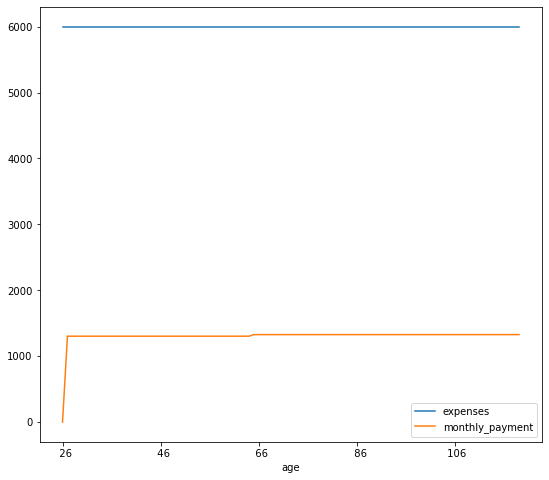

In [56]:
dfw.plot(x="age", y=["expenses", "monthly_payment"], kind="line", figsize=(9, 8))